In [1]:
%load_ext autoreload

%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import covariance as covar
import utils
import abundance as cl_count
import forecast
import pyccl as ccl
import edit
import h5py

In [2]:
def binning(corner): return [[corner[i],corner[i+1]] for i in range(len(corner)-1)]
z_grid = np.linspace(0.18, 1.3, 1500)
logm_grid = np.linspace(14.1,15.8, 1500)
Omega_c_true = 0.30711 - 0.048254
Omega_b_true = 0.048254
sigma8_true = .8288
Omegam_true = 0.30711
True_value = [Omega_c_true + Omega_b_true, sigma8_true]

In [3]:
forecastF=edit.load_pickle('/pbs/throng/lsst/users/cpayerne/ClusterLikelihoods_data/Covariances/Fisher_covariance.pickle')

In [4]:
f=forecast.Forecast()
z_grid = np.linspace(0.18, 1.3, 3000)
logm_grid = np.linspace(14.1,15.8
                        , 3000)

In [5]:
clc = cl_count.ClusterAbundance()
clc.sky_area = (0.25)*4*np.pi
clc.f_sky = clc.sky_area/(4*np.pi)
clc.z_grid=z_grid
clc.logm_grid=logm_grid

In [6]:
covUnbinned = f.Fisher_matrix_unbinned_Poissonian(True_value, [0.2,1.2], [14.2, 15.6], clc)

In [7]:
covUnbinned

array([[1551040.64077801, 2349099.39360125],
       [2349099.39360125, 4403180.90694888]])

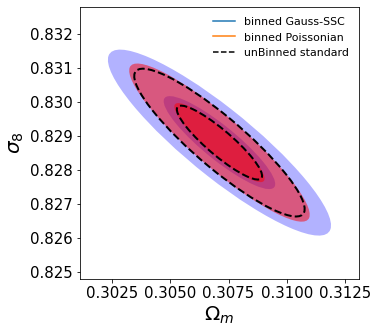

In [9]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
x=0.006
y=0.004
utils._make_ellipse(True_value, forecastF['4zx4m']['Gaussian'], ax, level=0.95, color=None, label = 'binned Gauss-SSC', ls = '-',facecolor='b', alpha=.3)
utils._make_ellipse(True_value, forecastF['4zx4m']['Poissonian'], ax, level=0.95, color=None, label = 'binned Poissonian',  ls = '-',facecolor='r', alpha=.5)
utils._make_ellipse(True_value, np.linalg.inv(covUnbinned), ax, level=0.95, color='k', label =  'unBinned standard', ls = '--', )
ax.set_xlim(True_value[0]-x, True_value[0]+x)
ax.set_ylim(True_value[1]-y, True_value[1]+y)
ax.set_ylabel(r'$\sigma_8$', fontsize=20)
ax.set_xlabel(r'$\Omega_m$', fontsize=20)
ax.tick_params(axis='both', which = 'major', labelsize= 15)
plt.legend(fontsize=11, frameon=False)
plt.savefig('err_unbinned.pdf', bbox_inches='tight', dpi=300)